# Modèle de Ross à deux populations

# # Le programme

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pylab as p

class ross2():
    
    def __init__(self,h10,v10,h20,v20): 
        
        # Entrées: paramètres initiaux
        
        # h10 : proportion d'humains infectées au sein de la population 1
        # v10 : proportion de vecteurs infectées au sein de la population 1
        # h20 : proportion d'humains infectées au sein de la population 2
        # v20 : proportion de vecteurs infectées au sein de la population 2
        
        self.H1 = 1000    # taille de la population humaine
        self.V1 = 10000   # taille de la population vectorielle (ex. moustique)
        self.b1 = 0.7     # taux de contagiosité pour la population humaine
        self.c1 = 0.7     # taux de guérison pour la population humaine
        self.d1 = 0.02    # taux de mortalité pour la population humaine
        self.beta1  = 0.7 # taux de contagiosité pour la population vectorielle
        self.delta1 = 0.7 # taux de mortalité pour la population vectorielle

        self.Ro1 = (self.V1/self.H1 * self.b1*self.beta1) / ((self.c1+self.d1)*self.delta1) # Paramètre d'équilibre endémique (thm Ross)
        
        self.H2 = 100000     # taille de la population humaine
        self.V2 = 10000   # taille de la population vectorielle (ex. moustique)
        self.b2 = 0.7     # taux de contagiosité pour la population humaine
        self.c2 = 0.7     # taux de guérison pour la population humaine
        self.d2 = 0.1     # taux de mortalité pour la population humaine
        self.beta2  = 0.7 # taux de contagiosité pour la population vectorielle
        self.delta2 = 0.7 # taux de mortalité pour la population vectorielle

        self.Ro2 = (self.V2/self.H2 * self.b2*self.beta2) / ((self.c2+self.d2)*self.delta2) # Paramètre d'équilibre endémique (thm Ross)
              
        self.X0 = [h10, v10, h20, v20]
        t  = np.arange(1,10,0.001)
        X  = integrate.odeint(self.dX_dt,self.X0,t)
        self.h1,self.v1,self.h2,self.v2 = X.T
        
    def dX_dt(self,X,t=0):

        h1 = X[0]
        v1 = X[1]
        h2 = X[2]
        v2 = X[3]
        
        dh1_dt = self.b1*self.V1/self.H1 * (1-h1)*(v1+v2) - (self.c1 + self.d1)*h1
        dv1_dt = self.beta1 * (1-v1) * h1 + self.beta2 * self.H2 / self.V1 * (1-v2) * h2 - self.delta1 *v1
        dh2_dt = self.b2*self.V2/self.H2 * (1-h2)*(v1+v2) - (self.c2 + self.d2)*h2
        dv2_dt = self.beta2 * (1-v2) * h2 + self.beta1 * self.H1 / self.V2 * (1-v1) * h1 - self.delta2 *v2

        return np.array([dh1_dt , dv1_dt, dh2_dt, dv2_dt])
    

    def plot(self): 
        
        plt.figure()
        plt.title('Evolution des populations infectées')
        plt.plot(r.h1,r.v1,color='blue')
        plt.plot(r.h2,r.v2,color='red')
        plt.xlabel('h')
        plt.ylabel('v')
        plt.grid()
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.show()
        
    
    def plot_field(self):
        
        ## Ensemble 1
        fig1 = plt.figure()
        fig1.suptitle('Population 1')
      
        t  = np.arange(1,10,0.001)
        X = integrate.odeint(self.dX_dt,self.X0,t) 
        p.plot( X[:,0], X[:,1],color='blue')

        # Création des grilles
        x = np.linspace(0, 1, 20)
        y = np.linspace(0, 1, 20)
        X1 , Y1  = np.meshgrid(x, y)  
        X2 , Y2  = np.meshgrid(x, y) 

        # Calcul de la direction en chaque point de la grille (faux)
        DH1, DV1, DH2, DV2 = self.dX_dt([X1, Y1, X2, Y2])  # Taux de croissance en chaque point 
        M1 = (np.hypot(DH1, DV1))   # Taux de croissance normalisé
        M1[ M1 == 0] = 1.           # pour éviter la division par 0
        DH1 /= M1 ; DV1 /= M1       # Vecteurs normalisés

        p.quiver(X1, Y1, DH1, DV1, M1, cmap=p.cm.jet)
        plt.xlabel('h1')
        plt.ylabel('v1')
        plt.grid()
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        fig1.show()
    
    
        ## Ensemble 2
        fig2 = plt.figure()
        plt.suptitle('Population 2')

        p.plot( X[:,2], X[:,3],color='red')
        
        M2 = (np.hypot(DH2, DV2))    # Taux de croissance normalisé
        M2[ M2 == 0] = 1.             # pour éviter la division par 0
        DH2 /= M2 ; DV2 /= M2         # Vecteurs normalisés

        p.quiver(X2, Y2, DH2, DV2, M2, cmap=p.cm.jet)
        plt.xlabel('h2')
        plt.ylabel('v2')
        plt.grid()
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        fig2.show()
    

# # Application

<ipython-input-1-54f447ccd6da>:99: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-1-54f447ccd6da>:118: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


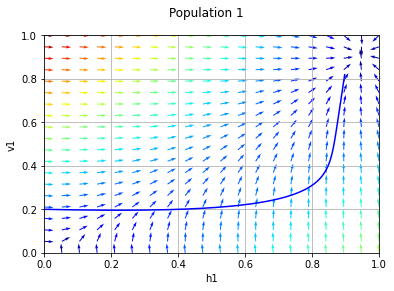

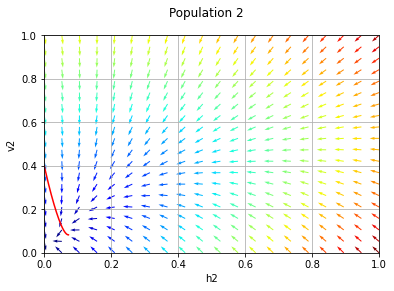

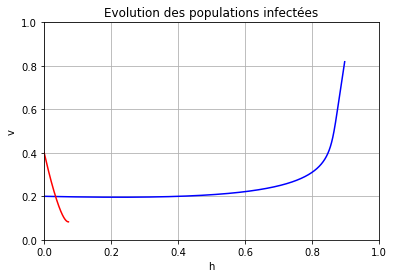

In [2]:
r = ross2(0,0.2,0,0.4)
r.plot_field()
r.plot()